1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import shap

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ConstantKernel as C
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

2. Loading and prehandling the dataset

In [ ]:
dataset = pd.read_csv(r"C:\Users\47036\Desktop\Etongue_SMILES_rdkit.csv")
dataset

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Partial_charge
0,12.881264,12.881264,0.074074,-4.002824,0.233991,567.060,535.812,566.148965,206,0,...,0,0,0,0,0,0,0,1,0,-0.030523
1,12.792871,12.792871,0.365445,-2.504254,0.352192,584.105,544.793,583.259138,214,0,...,0,0,0,0,0,0,0,0,0,-0.013281
2,9.553611,9.553611,0.320247,-1.257037,0.702606,390.867,367.683,390.134635,144,0,...,0,0,0,0,0,0,0,0,0,-0.013695
3,11.349448,11.349448,0.162551,-4.105997,0.768936,330.749,319.661,330.007720,112,0,...,1,0,0,0,0,0,0,0,0,-0.023477
4,10.762425,10.762425,0.418426,-0.771658,0.821600,206.285,188.141,206.130680,82,0,...,0,0,0,0,0,0,0,0,0,-0.062456
5,12.243546,12.243546,0.097186,-0.898787,0.852804,254.285,240.173,254.094294,96,0,...,0,0,0,0,0,0,0,0,0,-0.047765
6,12.403475,12.403475,0.117037,-0.117037,0.861716,266.304,252.192,266.116761,100,0,...,0,0,0,0,0,0,0,0,0,-0.037514
7,10.524469,10.524469,0.115102,-0.115102,0.595026,151.165,142.093,151.063329,58,0,...,0,0,0,0,0,0,0,0,0,0.015187
8,11.975791,11.975791,0.293611,-1.310347,0.736884,232.239,220.143,232.084792,88,0,...,0,0,0,0,0,0,0,0,1,-0.063513
9,13.068337,13.068337,0.000000,-1.742419,0.316570,482.505,451.257,482.191662,180,0,...,0,0,0,0,0,0,0,0,0,-0.056055


In [ ]:
df = pd.DataFrame(dataset)
print(df.shape)

(24, 210)


In [ ]:
dataset.var()

MaxAbsEStateIndex    5.237783
MaxEStateIndex       5.237783
MinAbsEStateIndex    0.017213
MinEStateIndex       2.039575
qed                  0.066465
                       ...   
fr_thiocyan          0.000000
fr_thiophene         0.041667
fr_unbrch_alkane     0.231884
fr_urea              0.079710
Partial_charge       0.000988
Length: 210, dtype: float64

In [ ]:
numeric = dataset._get_numeric_data()
var = numeric.var()
variable = []

for i in range(0,len(var)):
    if var[i]>0.01:
       variable.append(numeric.columns[i])
print (variable)

['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP

In [ ]:
#filter out numeric columns with a variance of <= 0.01
filtered_dataset = dataset[variable]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
filtered_dataset

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,TPSA,EState_VSA1,EState_VSA10,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Nhpyrrole,fr_allylic_oxid,fr_amide,fr_aniline,fr_aryl_methyl,fr_barbitur,fr_benzene,fr_bicyclic,fr_dihydropyridine,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzone,fr_imide,fr_ketone,fr_ketone_Topliss,fr_lactone,fr_methoxy,fr_nitro,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.881264,12.881264,0.074074,-4.002824,0.233991,567.060,535.812,566.148965,206,0.336345,0.465580,0.336345,1.052632,1.684211,2.210526,35.495693,9.799283,2.391573,-2.313150,2.413809,-2.346367,7.854217,-0.138696,2.886646,4.230000e-07,1293.336234,28.294318,21.270444,22.842870,18.060298,11.572752,13.390780,7.851861,9.680598,5.311398,6.523488,3.710950,4.456866,-3.22,1.342455e+08,31.000464,14.647643,8.138563,226.703816,25.261045,0.000000,0.000000,0.000000,10.118127,11.938611,4.552750,9.589074,8.417797,0.000000,47.999142,37.610027,17.264429,54.587081,36.770210,33.657677,0.000000,5.316789,5.733667,24.660864,33.475200,87.723676,0.000000,11.050456,0.000000,0.000000,11.600940,58.384357,33.917790,0.000000,25.328832,82.033075,5.022633,0.000000,154.25,27.974643,18.006871,23.682352,40.704906,0.000000,19.242532,56.312044,0.000000,5.316789,36.097946,45.021612,6.422443,25.386890,3.521579,7.700858,-1.864127,14.467631,0.000000,4.415479,-2.711254,0.307692,38,4,10,0,1,1,2,0,2,9,3,12,9,0,0,0,3,3.19960,141.8337,0,0,0,0,0,0,0,0,0,2,2,0,0,1,1,0,0,0,1,0,0,0,0,2,0,1,2,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,12.792871,12.792871,0.365445,-2.504254,0.352192,584.105,544.793,583.259138,214,0.228840,0.494498,0.228840,0.975000,1.700000,2.400000,35.495693,10.012203,2.268795,-2.422723,2.387901,-2.519175,7.700275,0.098182,2.951427,1.270460e+00,1368.238526,28.277446,23.730749,25.381105,19.206860,13.777924,16.757105,10.950218,14.540949,7.796858,9.623736,5.468090,6.762046,-2.84,9.384077e+08,28.680176,12.351238,6.716074,241.803109,29.735308,17.914038,5.817863,5.948339,0.000000,0.000000,4.899910,4.983979,4.983979,0.000000,23.733674,57.484435,62.368673,24.681414,9.301911,52.875733,0.000000,19.767777,0.000000,18.883484,82.289146,53.684046,5.749512,25.574890,28.828361,5.749512,18.742833,92.565276,4.565048,0.000000,12.841643,48.661413,5.022633,0.000000,85.86,7.141893,4.565048,0.000000,28.518062,48.607850,25.931156,26.636292,30.331835,54.481670,16.337803,18.540712,6.427573,16.494704,7.625491,2.623471,1.521738,14.361112,3.89764

In [ ]:

df_small =  pd.DataFrame(filtered_dataset)
df_small.corr()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,TPSA,EState_VSA1,EState_VSA10,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Nhpyrrole,fr_allylic_oxid,fr_amide,fr_aniline,fr_aryl_methyl,fr_barbitur,fr_benzene,fr_bicyclic,fr_dihydropyridine,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzone,fr_imide,fr_ketone,fr_ketone_Topliss,fr_lactone,fr_methoxy,fr_nitro,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_thiophene,fr_unbrch_alkane,fr_urea
MaxAbsEStateIndex,1.000000,1.000000,-0.360355,-0.516910,-0.123232,0.686193,0.697484,0.686413,0.669708,0.448867,0.232788,0.632646,-0.208206,0.084946,0.406015,0.206039,-0.197096,0.387677,-0.148977,0.419657,-0.178108,0.458243,-0.148996,0.789151,-0.331855,0.772744,0.680823,0.656631,0.656802,0.709882,0.660219,0.664634,0.590397,0.608892,0.605617,0.646094,0.497386,0.555435,-0.740083,0.318190,0.622324,0.538356,0.284724,0.683012,0.410920,0.631349,0.391612,0.251061,0.485047,0.379241,0.529284,0.472452,0.017574,0.229479,0.294125,0.289896,0.480177,0.542266,0.555947,0.562655,-0.437233,0.400461,0.004936,0.268809,0.411449,0.542927,0.511088,0.295692,0.390947,0.363771,-0.012481,0.537811,0.533665,0.271979,0.246451,0.534243,-6.561947e-02,0.540307,0.480067,0.584722,0.712365,0.464816,0.508246,0.186076,0.194747,0.497032,0.262622,-0.022728,0.036864,0.645784,-0.050658,0.689907,0.311673,-0.550204,-0.486031,0.187520,-0.063276,0.327261,0.040051,-0.257465,0.700382,-0.092248,0.620134,-2.177274e-01,0.544223,0.231553,0.439012,0.388206,0.556761,0.675750,0.098695,0.647772,0.336751,-0.238560,4.799601e-01,0.060817,0.626841,0.309899,0.666001,2.915482e-02,0.248947,0.167516,0.190611,0.382264,0.146982,0.149444,0.098015,0.098015,0.478073,0.430297,-0.437233,0.412396,5.753177e-02,-5.486909e-01,0.288173,0.316271,0.146982,0.354148,0.243114,0.243389,0.101059,0.020997,0.439012,0.327814,0.105269,0.328859,0.516268,-1.212299e-01,-0.437233,2.432513e-01,0.249001,0.020997,0.341094,3.591432e-01,0.237782,0.429637,-0.130381,0.097042,0.149444,0.149444,2.420775e-01,4.355592e-01,-0.133045,1.900579e-01,-0.130381,7.930284e-02,0.288173,-1.781997e-01,0.223530
MaxEStateIndex,1.000000,1.000000,-0.360355,-0.516910,-0.123232,0.686193,0.697484,0.686413,0.669708,0.448867,0.232788,0.632646,-0.208206,0.084946,0.406015,0.206039,-0.197096,0.387677,-0.148977,0.419657,-0.178108,0.458243,-0.148996,0.789151,-0.331855,0.772744,0.680823,0.656631,0.656802,0.709882,0.660219,0.664634,0.590397,0.608892,0.605617,0.646094,0.497386,0.555435,-0.740083,0.318190,0.622324,0.53

In [ ]:
print(filtered_dataset.shape)

(24, 169)


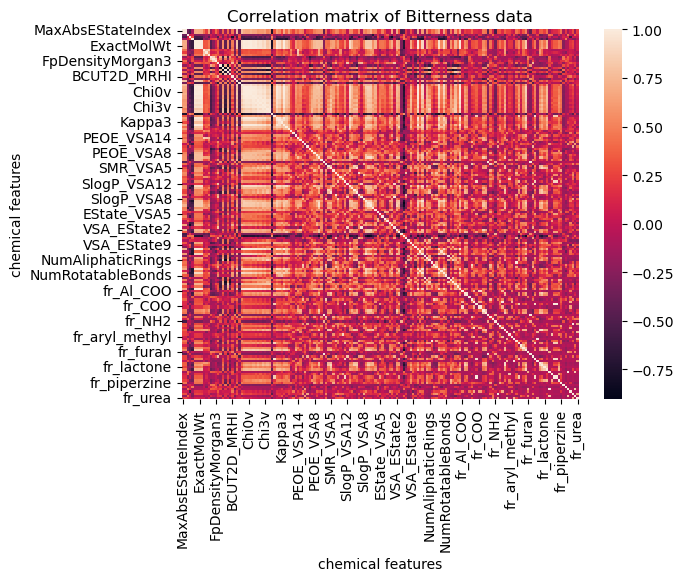

In [ ]:
# Correlation matrix of the filtered dataset
correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = False)
plt.title("Correlation matrix of Bitterness data")
plt.xlabel("chemical features")
plt.ylabel("chemical features")
plt.show( )

In [ ]:
# Selecting upper triangle of correlation matrix
upper_tri = correlation_mat.where(np.triu(np.ones(correlation_mat.shape),
                                      k=1).astype(bool))
print(upper_tri)


                          MaxAbsEStateIndex  MaxEStateIndex  \
MaxAbsEStateIndex                       NaN             1.0   
MaxEStateIndex                          NaN             NaN   
MinAbsEStateIndex                       NaN             NaN   
MinEStateIndex                          NaN             NaN   
qed                                     NaN             NaN   
MolWt                                   NaN             NaN   
HeavyAtomMolWt                          NaN             NaN   
ExactMolWt                              NaN             NaN   
NumValenceElectrons                     NaN             NaN   
MaxPartialCharge                        NaN             NaN   
MaxAbsPartialCharge                     NaN             NaN   
MinAbsPartialCharge                     NaN             NaN   
FpDensityMorgan1                        NaN             NaN   
FpDensityMorgan2                        NaN             NaN   
FpDensityMorgan3                        NaN            

In [ ]:
# Finding index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['MaxEStateIndex', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'Kappa1', 'Kappa2', 'LabuteASA', 'SlogP_VSA5', 'SlogP_VSA6', 'EState_VSA10', 'VSA_EState10', 'HeavyAtomCount', 'NumHAcceptors', 'NumHeteroatoms', 'NumSaturatedCarbocycles', 'MolMR', 'fr_COO2', 'fr_Imine', 'fr_Nhpyrrole', 'fr_benzene', 'fr_guanido', 'fr_imide', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_sulfide', 'fr_thiophene']


In [ ]:
# Droping marked features
# Further filter the dataset
df1 = df_small.drop(to_drop, axis=1)
print(df1.head())

   MaxAbsEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed    MolWt  \
0          12.881264           0.074074       -4.002824  0.233991  567.060   
1          12.792871           0.365445       -2.504254  0.352192  584.105   
2           9.553611           0.320247       -1.257037  0.702606  390.867   
3          11.349448           0.162551       -4.105997  0.768936  330.749   
4          10.762425           0.418426       -0.771658  0.821600  206.285   

   MaxPartialCharge  MaxAbsPartialCharge  MinAbsPartialCharge  \
0          0.336345             0.465580             0.336345   
1          0.228840             0.494498             0.228840   
2          0.328066             0.478071             0.328066   
3          0.337345             0.477583             0.337345   
4          0.310185             0.480789             0.310185   

   FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  BCUT2D_MWHI  \
0          1.052632          1.684211          2.210526    35.495693

In [ ]:
print(df1.shape)

(24, 130)


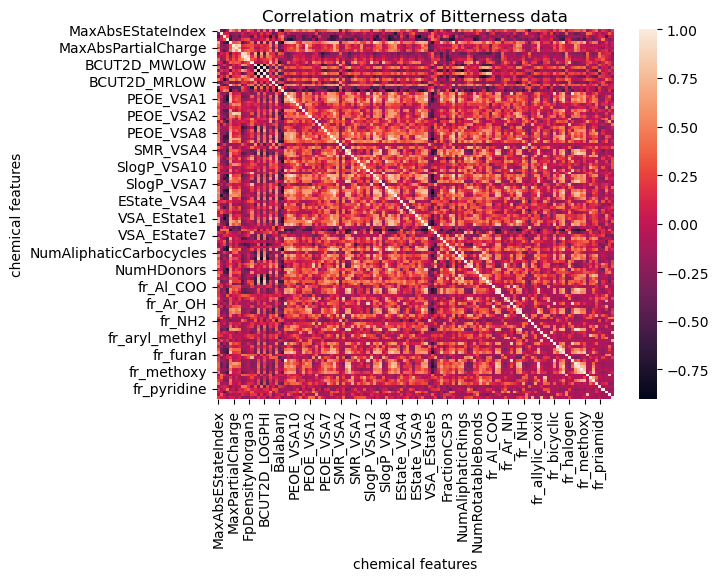

In [ ]:
# Correlation matrix of the further filtered dataset
correlation_mat = df1.corr()

sns.heatmap(correlation_mat, annot = False)
plt.title("Correlation matrix of Bitterness data")
plt.xlabel("chemical features")
plt.ylabel("chemical features")
plt.show( )

In [ ]:
# Save filtered dataset
df1.to_csv('C:/Users/47036/Desktop/Etongue_filtered_dataset2.csv', index=False)

In [ ]:
# Load filtered dataset
dataset = pd.read_csv(r"C:\Users\47036\Desktop\Etongue_filtered_log.csv")
dataset

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,MaxPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,...,fr_nitro,fr_para_hydroxylation,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_sulfonamd,fr_unbrch_alkane,fr_urea,Log(Bitterness Concentration)
0,12.881264,0.074074,-4.002824,0.233991,567.060,0.336345,0.465580,0.336345,1.052632,1.684211,...,0,0,0,0,0,0,0,1,0,-1.186365
1,12.792871,0.365445,-2.504254,0.352192,584.105,0.228840,0.494498,0.228840,0.975000,1.700000,...,0,1,1,1,0,0,0,0,0,-3.015157
2,9.553611,0.320247,-1.257037,0.702606,390.867,0.328066,0.478071,0.328066,1.074074,1.666667,...,0,0,0,0,0,1,0,0,0,0.080343
3,11.349448,0.162551,-4.105997,0.768936,330.749,0.337345,0.477583,0.337345,1.428571,2.142857,...,0,0,0,0,0,0,1,0,0,175.053078
4,10.762425,0.418426,-0.771658,0.821600,206.285,0.310185,0.480789,0.310185,1.200000,1.733333,...,0,0,0,0,0,0,0,0,0,-2.368503
5,12.243546,0.097186,-0.898787,0.852804,254.285,0.310186,0.480789,0.310186,0.947368,1.578947,...,0,0,0,0,0,0,0,0,0,6.090116
6,12.403475,0.117037,-0.117037,0.861716,266.304,0.259041,0.318474,0.259041,1.200000,2.000000,...,0,0,0,0,0,2,0,0,0,21.468808
7,10.524469,0.115102,-0.115102,0.595026,151.165,0.220747,0.507964,0.220747,1.363636,1.909091,...,0,0,0,0,0,0,0,0,0,-1.960709
8,11.975791,0.293611,-1.310347,0.736884,232.239,0.327651,0.327651,0.276523,1.000000,1.529412,...,0,0,0,0,0,0,0,0,1,55.916928
9,13.068337,0.000000,-1.742419,0.316570,482.505,1.000000,1.000000,0.550155,1.205882,1.911765,...,0,0,0,0,0,0,0,0,0,9.215593


3.Linear Regression Model Training and Evaluation

In [ ]:
# Split data into features and target
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [ ]:
X

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,MaxPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,...,fr_methoxy,fr_nitro,fr_para_hydroxylation,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_sulfonamd,fr_unbrch_alkane,fr_urea
0,12.881264,0.074074,-4.002824,0.233991,567.060,0.336345,0.465580,0.336345,1.052632,1.684211,...,1,0,0,0,0,0,0,0,1,0
1,12.792871,0.365445,-2.504254,0.352192,584.105,0.228840,0.494498,0.228840,0.975000,1.700000,...,1,0,1,1,1,0,0,0,0,0
2,9.553611,0.320247,-1.257037,0.702606,390.867,0.328066,0.478071,0.328066,1.074074,1.666667,...,0,0,0,0,0,0,1,0,0,0
3,11.349448,0.162551,-4.105997,0.768936,330.749,0.337345,0.477583,0.337345,1.428571,2.142857,...,0,0,0,0,0,0,0,1,0,0
4,10.762425,0.418426,-0.771658,0.821600,206.285,0.310185,0.480789,0.310185,1.200000,1.733333,...,0,0,0,0,0,0,0,0,0,0
5,12.243546,0.097186,-0.898787,0.852804,254.285,0.310186,0.480789,0.310186,0.947368,1.578947,...,0,0,0,0,0,0,0,0,0,0
6,12.403475,0.117037,-0.117037,0.861716,266.304,0.259041,0.318474,0.259041,1.200000,2.000000,...,0,0,0,0,0,0,2,0,0,0
7,10.524469,0.115102,-0.115102,0.595026,151.165,0.220747,0.507964,0.220747,1.363636,1.909091,...,0,0,0,0,0,0,0,0,0,0
8,11.975791,0.293611,-1.310347,0.736884,232.239,0.327651,0.327651,0.276523,1.000000,1.529412,...,0,0,0,0,0,0,0,0,0,1
9,13.068337,0.000000,-1.742419,0.316570,482.505,1.000000,1.000000,0.550155,1.205882,1.911765,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

,Log(Bitterness Concentration)
0,-1.186365
1,-3.015157
2,0.080343
3,175.053078
4,-2.368503
5,6.090116
6,21.468808
7,-1.960709
8,55.916928
9,9.215593


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19, 130)
(5, 130)
(19, 1)
(5, 1)


In [ ]:
# Linear Regression model building
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Linear Regression Model Evaluation
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred

,Predicted
0,20.163315
1,-189.088071
2,-404.009479
3,34.902991
4,15.448969


In [ ]:
y_test

,Log(Bitterness Concentration)
20,-0.659825
2,0.080343
17,-2.136187
18,3.887673
19,0.340753


In [ ]:
# Test data error metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: {}'.format(regressor.score(X_test, y_test)))

Mean Absolute Error: 131.5976759289752
Mean Squared Error: 39782.12851402658
Root Mean Squared Error: 199.45457757100132
Variance score: -10056.395865733637


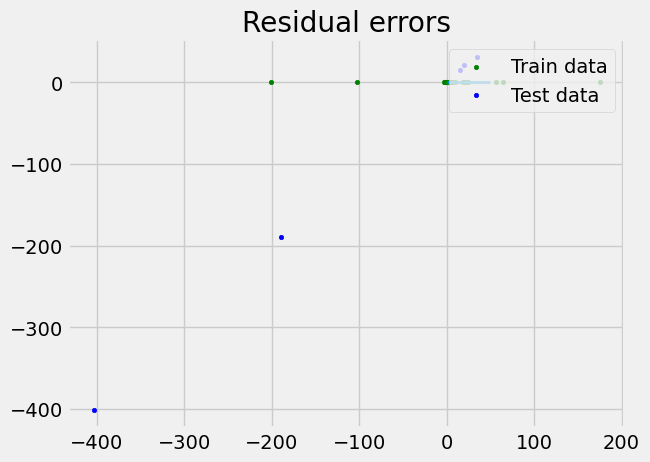

In [ ]:
# Residual errors plot
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(regressor.predict(X_train),
            regressor.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(regressor.predict(X_test),
            regressor.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')

plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
plt.legend(loc='upper right')
plt.title("Residual errors")

plt.show()

4.XGBoost Model Training and Evaluation

In [ ]:
xgb_r = xgboost.XGBRegressor(objective ='reg:linear',colsample_bytree = 0.8, gamma = 0.25, learning_rate = 0.01, max_depth =  4,min_child_weight = 1,n_estimators = 50,reg_lambda = 1.0, subsample = 0.9)
#'colsample_bytree': 0.8, 'gamma': 0.25, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 50, 'reg_lambda': 1.0, 'subsample': 0.9
xgb_r.fit(X_train, y_train)
# make predictions for test data
pred = xgb_r.predict(X_test)
pred

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


[02:26:15] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


array([  0.954866 ,   0.7620328, -19.331297 ,   1.5345175,  14.548618 ],
      dtype=float32)

In [ ]:
# XGBoost Test Set Evaluation
rmse = np.sqrt(MSE(y_test, pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('Variance score: {}'.format(xgb_r.score(X_test, y_test)))
print("RMSE : % f" %(rmse))

Mean Absolute Error: 7.210502399148547
Mean Squared Error: 101.22890160126306
Root Mean Squared Error: 10.061257456265746
Variance score: -24.591871890372424
RMSE :  10.061257


In [ ]:
# XGBoost Training Set Evaluation
pred2 = xgb_r.predict(X_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred2)))
print('Variance score: {}'.format(xgb_r.score(X_train, y_train)))

Mean Absolute Error: 28.50809653537141
Mean Squared Error: 3001.959146132798
Root Mean Squared Error: 54.79013730711758
Variance score: 0.3657291819178645


5.Gaussian Process Regression Model Training and Evaluation

In [ ]:
# Define the kernel with parameters to be tuned
kernel = C(1.0, (1e-2, 1e5)) * RBF(1.0, (1e-9, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+4))

# Instantiate the Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)

# Define a grid over the hyperparameters and bounds:
param_grid = {
    "kernel__k1__k1__constant_value": [1e-2, 1e-1, 1, 10, 100, 1000, 10000],
    "kernel__k1__k2__length_scale": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    "kernel__k2__noise_level": [1e-1, 1, 10, 100, 1000, 10000]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(gp, param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2)
grid_search.fit(X_train, y_train)

# Results
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Best model


Fitting 5 folds for each of 210 candidates, totalling 1050 fits
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_l

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09,

The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-08, kernel__

The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-07, kernel__

The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-06, kern

The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, ke

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel

The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.01, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_leve

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-08, kernel__k2__

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=10;

[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=0.1, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_le

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_lev

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1; total time=  

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=10; total time=   0.

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=10; total time=   0

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_le

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-08, kernel__k2__no

[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=

[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=100, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_le

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_le

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-0

[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-07, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-06

[CV] END kernel__k1__k1__constant_value=1000, kernel__k1__k2__length_scale=1e-05, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=100; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=1000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=

The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-09, kernel__k2__noise_level=10000; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s


The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.


[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=0.1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-08, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-08, kernel

[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=1; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-06, kernel__k2__noise_level=10; total time=   0.0s
[CV] END kernel__k1__k1__constant_value=10000, kernel__k1__k2__length_scale=1e-06, kernel__k

Mean Absolute Error: 1.4209561828
Mean Squared Error: 4.047047122867933
Root Mean Squared Error: 2.011727397752472
Variance score: -0.02314171016792055
Standard Deviation: [68.89731788 68.89731788 68.89731788 68.89731788 68.89731788]
R-squared: -0.02314171016792055
Mean Absolute Error: 36.69224927663158
Mean Squared Error: 4746.8402538841765
Root Mean Squared Error: 68.89731673936349
Variance score: 0.999999996761198


X has feature names, but GaussianProcessRegressor was fitted without feature names


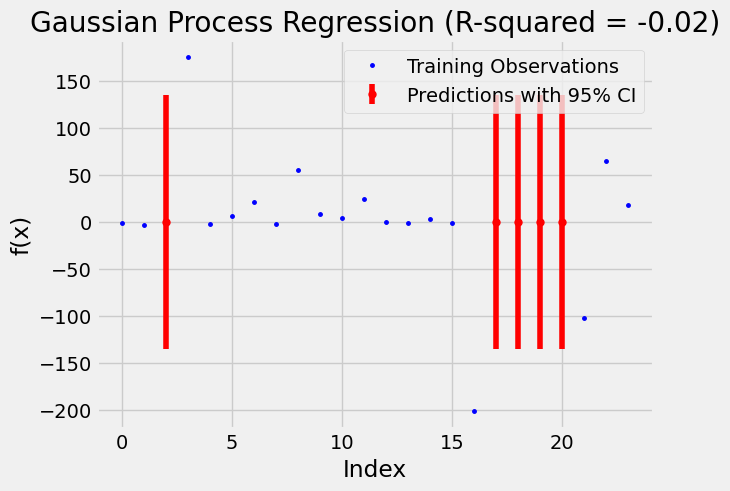

In [ ]:
best_gp = grid_search.best_estimator_
best_gp.fit(X_train, y_train)

# Predictions with standard deviation
y_pred3, sigma = best_gp.predict(X_test, return_std=True)
r2_score_value = r2_score(y_test, y_pred3)

# GPR Test Set Evaluation
sigma = sigma.reshape(-1)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print('Variance score: {}'.format(r2_score(y_test, y_pred3)))
print("Standard Deviation:", sigma)
print("R-squared:", r2_score_value)

# GPR Training Set Evaluation
pred4 = gp.predict(X_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred4))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred4)))
print('Variance score: {}'.format(best_gp.score(X_train, y_train)))

plt.figure()
plt.errorbar(X_test.index, y_pred3, yerr=1.96*sigma, fmt='r.', markersize=10, label='Predictions with 95% CI')
plt.plot(X_train.index, y_train, 'b.', markersize=5, label='Training Observations')
plt.xlabel('Index')
plt.ylabel('f(x)')
plt.title(f'Gaussian Process Regression (R-squared = {r2_score_value:.2f})')
plt.legend()
plt.show()

6.XGBoost SHAP analysis for Feature Importance Ranking

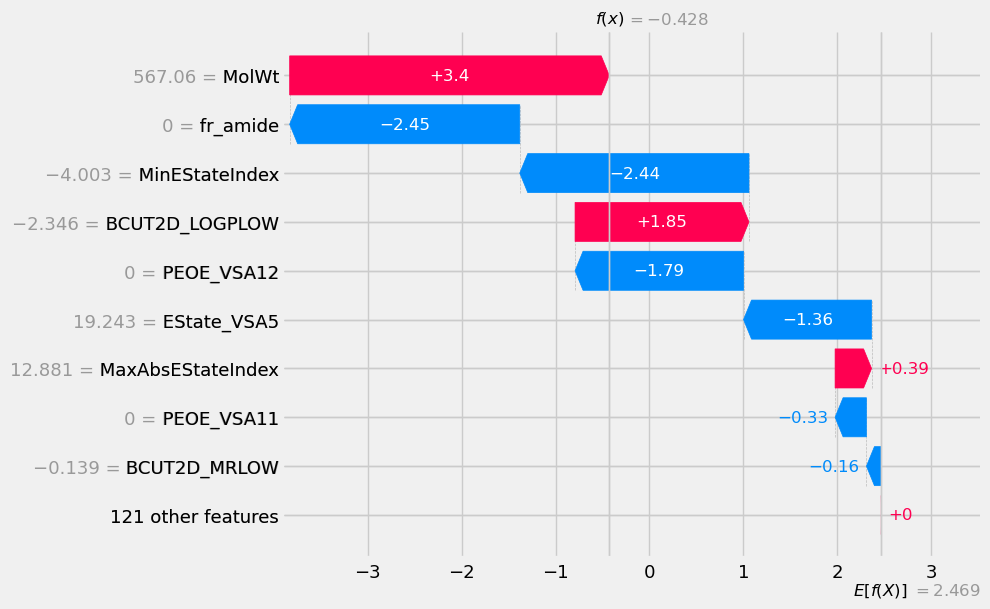

In [ ]:
# Explain XGBoost model's predictions using SHAP
explainer = shap.TreeExplainer(xgb_r)
shap_values = explainer(X)

# Plot the SHAP values for the first prediction
shap.waterfall_plot(shap_values[0])


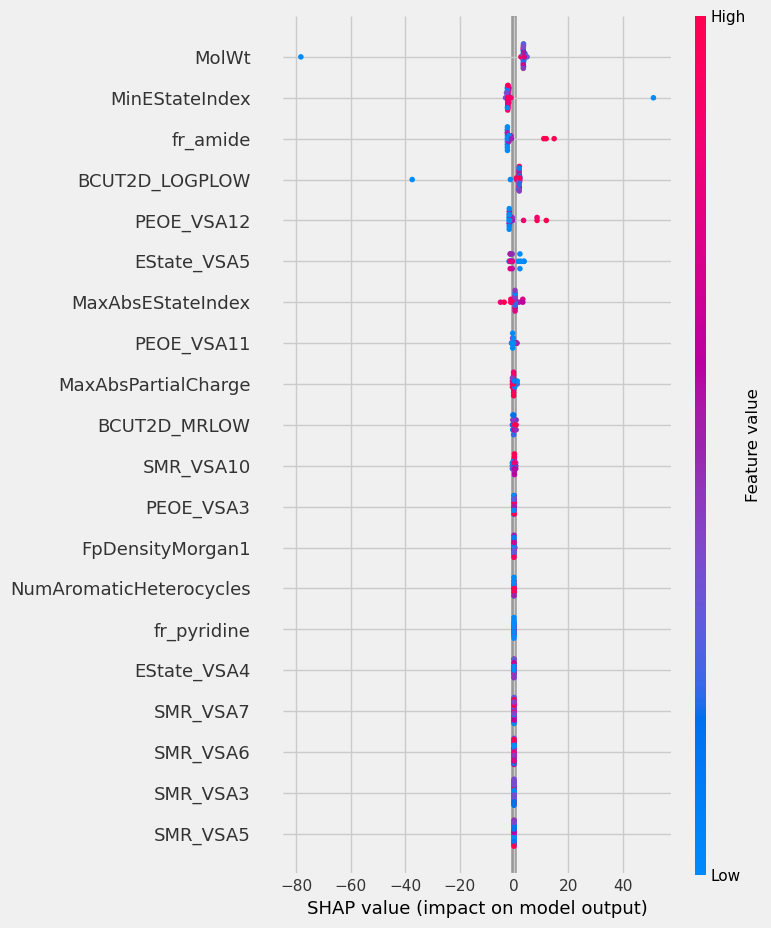

In [ ]:
shap.summary_plot(shap_values, X)

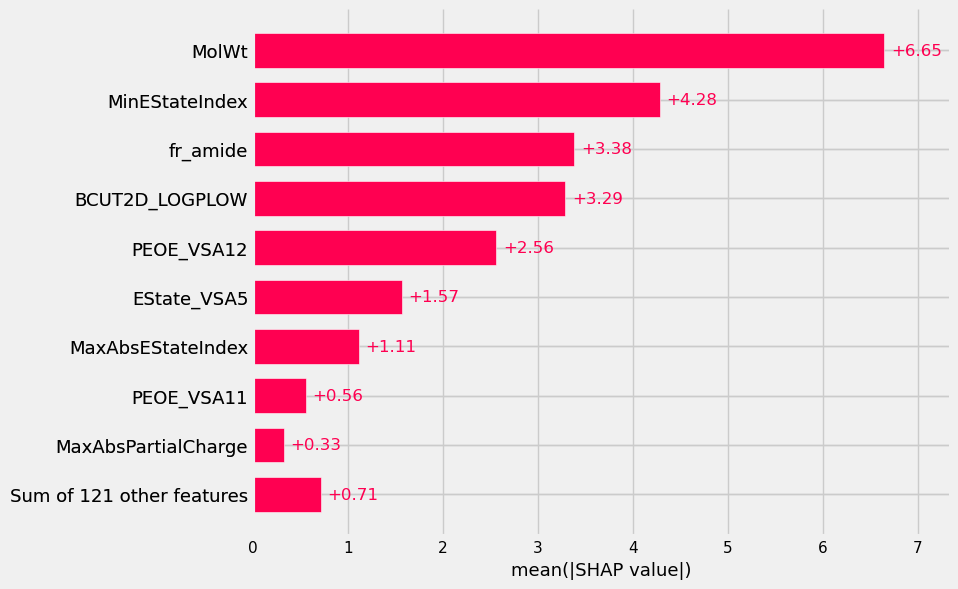

In [ ]:
shap.plots.bar(shap_values)

7. Feature Importance Ranking with RandomForest And SelectKBest

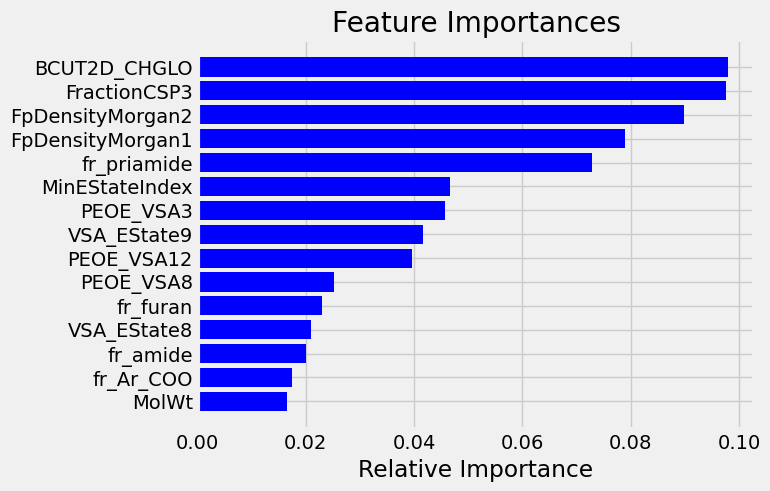

In [ ]:
# Feature Importance Ranking with RandomForest
df=dataset.drop(['Log(Bitterness Concentration)'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df, dataset['Log(Bitterness Concentration)'])
features = dataset.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 15 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Feature Importance Ranking with SelectKBest
# define number of features to keep

k = 15

# perform feature selection

X_new = SelectKBest(f_regression, k=k).fit_transform(X, y)

# get feature names of selected features

selected_features = X.columns[SelectKBest(f_regression, k=k).fit(X, y).get_support()]

# print selected features

print(selected_features)

Index(['qed', 'BCUT2D_LOGPHI', 'PEOE_VSA12', 'PEOE_VSA13', 'VSA_EState9',
       'fr_Ar_COO', 'fr_NH1', 'fr_ether', 'fr_furan', 'fr_ketone_Topliss',
       'fr_lactone', 'fr_methoxy', 'fr_piperdine', 'fr_priamide',
       'fr_sulfonamd'],
      dtype='object')


D:\1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


D:\1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


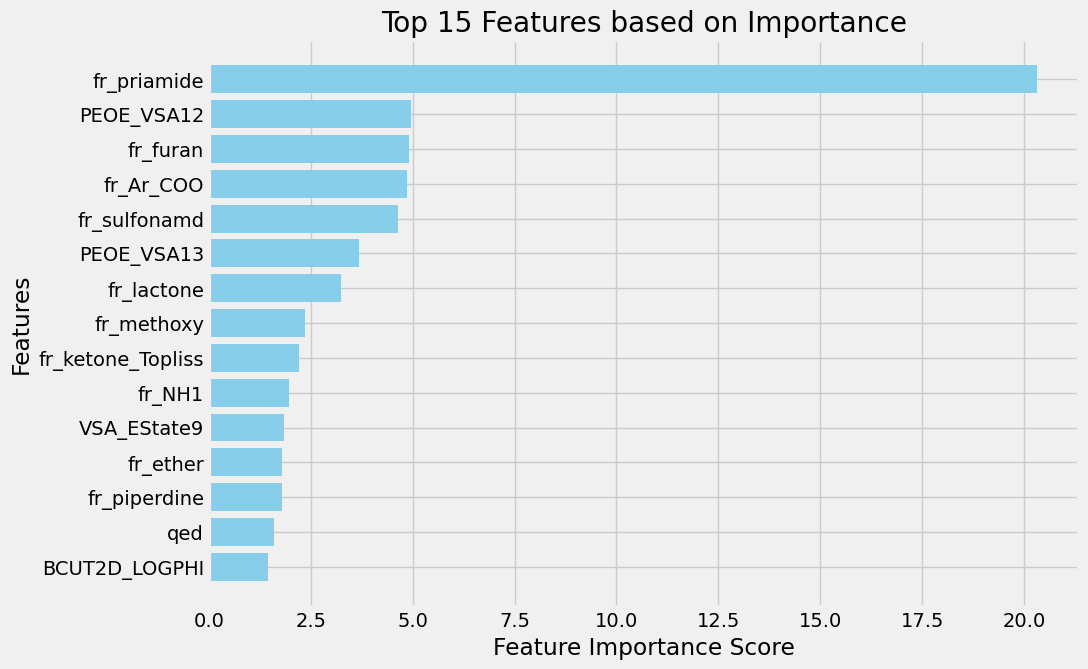

In [ ]:
# Use SelectKBest to get the scores for each feature
selector = SelectKBest(f_regression, k='all')  # 'all' will ensure all features are considered
selector.fit(X, y)

# Get the scores and feature names
scores = selector.scores_
features = X.columns

# Create a DataFrame for easy sorting and ranking
features_df = pd.DataFrame({'feature': features, 'score': scores})

# Sort and rank the features based on scores
features_df = features_df.sort_values(by='score', ascending=False)
features_df['rank'] = range(1, len(features_df) + 1)

# Select the top 15 features
top_15 = features_df.head(15)

# Plotting the top 15 features
plt.figure(figsize=(10, 7))
plt.barh(top_15['feature'], top_15['score'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 15 Features based on Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()